<a href="https://colab.research.google.com/github/sumyuck/CVDL/blob/main/practical-1_image-processing-basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

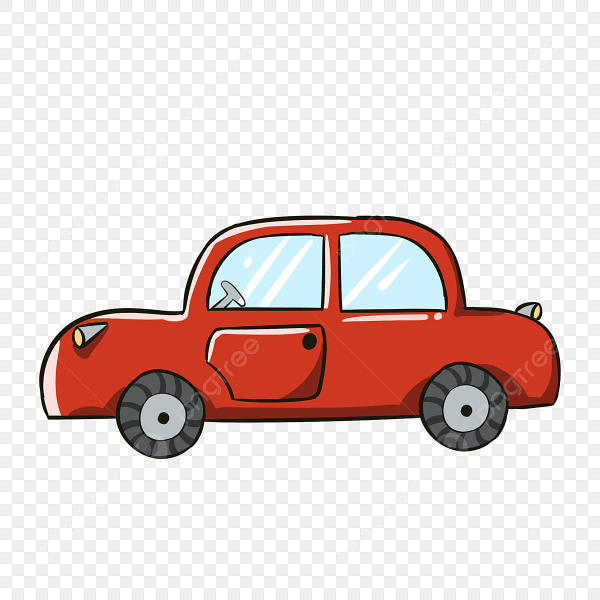

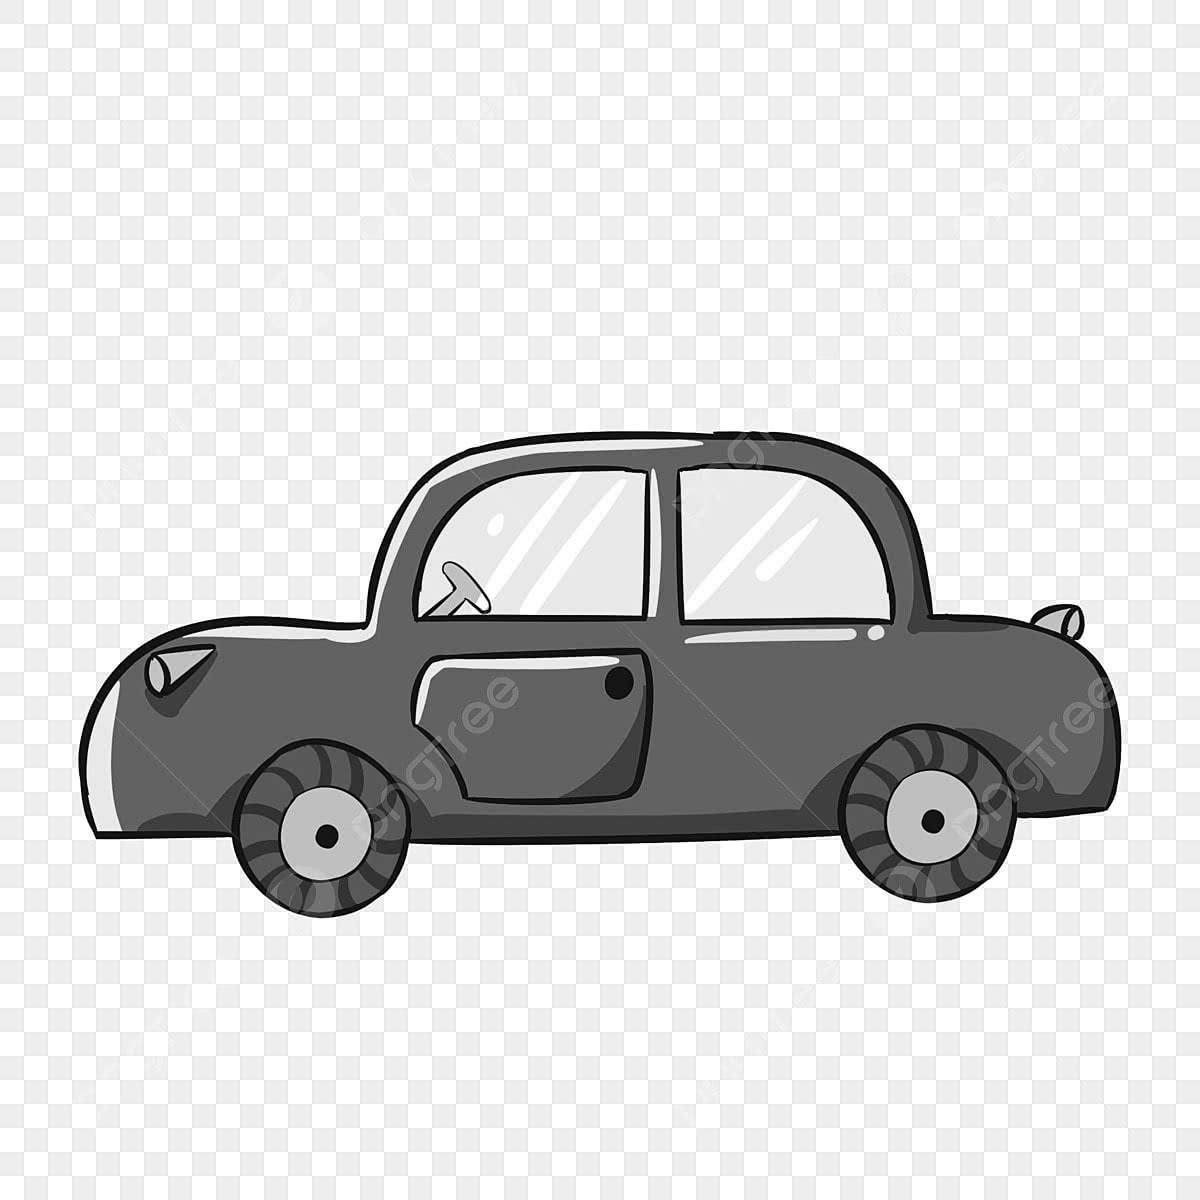

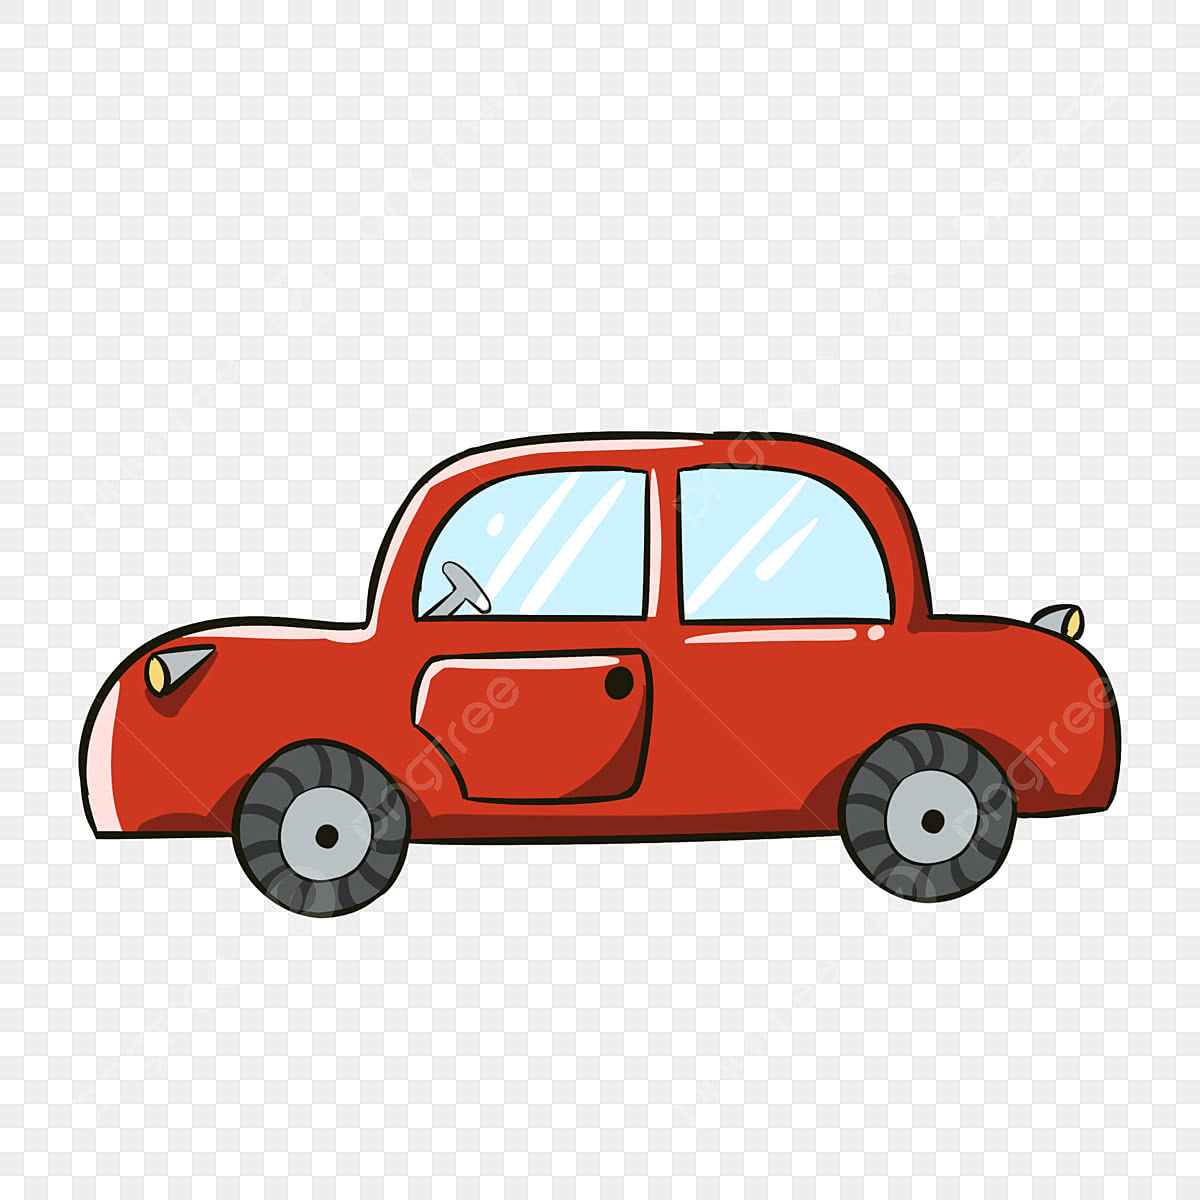

In [9]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np

def custom_resize(image, new_width, new_height):
    original_height, original_width = image.shape[:2]
    new_height = original_height // 2
    new_width = original_width // 2

    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):

            pixels = []
            if i*2 < original_height and j*2 < original_width:
                pixels.append(image[i*2, j*2])
            if i*2 < original_height and j*2+1 < original_width:
                pixels.append(image[i*2, j*2+1])
            if i*2+1 < original_height and j*2 < original_width:
                pixels.append(image[i*2+1, j*2])
            if i*2+1 < original_height and j*2+1 < original_width:
                pixels.append(image[i*2+1, j*2+1])

            if pixels:
                resized_image[i, j] = np.mean(pixels, axis=0)
            else:
                resized_image[i, j] = np.zeros(image.shape[2], dtype=image.dtype)


    return resized_image

def custom_grayscale(image):
    grayscale_image = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            grayscale_image[i, j] = int(np.mean(image[i, j]))
    return grayscale_image

def process_image(image):
    resized = custom_resize(image, int(image.shape[1]/2), int(image.shape[0]/2))

    grayscale = custom_grayscale(image)

    return resized, grayscale

image_path = 'car.jpg'

if os.path.exists(image_path):
    original_image = cv2.imread(image_path)

    if original_image is not None:
        resized_image, grayscale_image = process_image(original_image)

        cv2_imshow(resized_image)
        cv2_imshow(grayscale_image)
        cv2_imshow(original_image)

        cv2.imwrite('resized_image.jpg', resized_image)
        cv2.imwrite('grayscale_image.jpg', grayscale_image)

        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print(f"Failed to read image at {image_path}")

else:
    print(f"File not found: {image_path}")

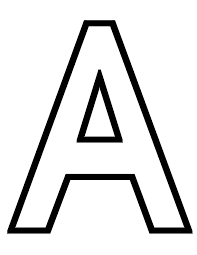

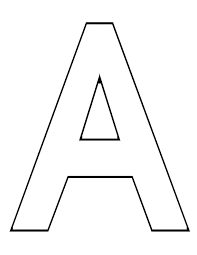

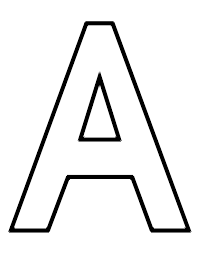

In [ ]:
# Apply minimum filter
min_filtered = cv2.erode(original_image, kernel=np.ones((3,3), np.uint8))

# Apply maximum filter
max_filtered = cv2.dilate(original_image, kernel=np.ones((3,3), np.uint8))

# Apply median filter
median_filtered = cv2.medianBlur(original_image, 3)  # kernel size should be odd

cv2_imshow(min_filtered)
cv2_imshow(max_filtered)
cv2_imshow(median_filtered)

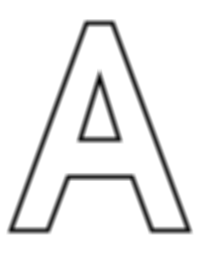

In [ ]:
# Apply averaging filter (simple blur)
average_filtered = cv2.blur(original_image, (5, 5))  # Adjust kernel size as needed
cv2_imshow(average_filtered)

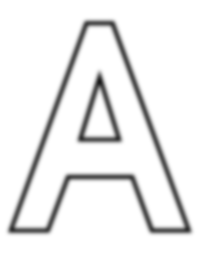

In [ ]:
# Apply weighted averaging filter (Gaussian blur)
weighted_average_filtered = cv2.GaussianBlur(original_image, (11, 11), 0)  # Adjust kernel size as needed
cv2_imshow(weighted_average_filtered)
